# **#Importing libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **#Importing dataset**

In [72]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [73]:
train.shape

(891, 12)

In [74]:
test.shape

(418, 11)

# **#Preprocessing**

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Preprocessing : [1] - Feature selection**

In [77]:
df_train = train.drop(columns=['PassengerId', 'Name' , 'Ticket'])

In [78]:
df_test = test.drop(columns=['PassengerId', 'Name' , 'Ticket'])

I dropped the Ticket because the Cabin and Ticket are very close features

In [79]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [80]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


# **Preprocessing : [2] - Handling missing values**

Handling the mising values for the training set

In [81]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


TRAIN SET ::
Now i have 3 columns that contain missing values ......
Age , Cabin & Embarked

In [82]:
fill_values = {'Age': df_train['Age'].mean(), 'Cabin': 'Unknown', 'Embarked': 'S'}
df_train.fillna(fill_values , inplace=True)

In [83]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


Handling the missing values for the test set

In [84]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Cabin,327
Embarked,0


TRAIN SET ::
Now i have 2 columns that contain missing values ......
Age & Cabin

In [85]:
fill_values = {'Age': df_test['Age'].mean(), 'Cabin': 'Unknown', 'Fare': df_test['Fare'].mean()} # Added 'Fare' to fill_values
df_test.fillna(fill_values , inplace=True)

In [86]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,Unknown,Q
1,3,female,47.0,1,0,7.0000,Unknown,S
2,2,male,62.0,0,0,9.6875,Unknown,Q
3,3,male,27.0,0,0,8.6625,Unknown,S
4,3,female,22.0,1,1,12.2875,Unknown,S


# **Preprocessing : [3] - Handling outliers**

In [87]:
df_train['Age'].max()

80.0

In [88]:
df_train['Age'].min()

0.42

In [89]:
df_train['Age'].median()

29.69911764705882

After computing max , min and median of the Age column i concluded that the ages distribution is completely normal 0.42 <= Age <= 80

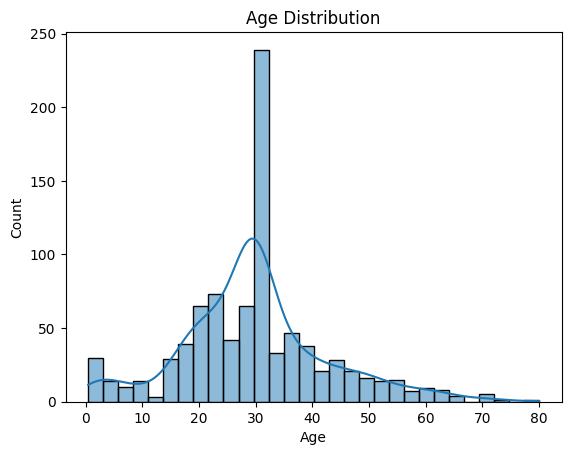

In [90]:
sns.histplot(df_train['Age'], kde=True)

plt.title('Age Distribution')
plt.show()

In [91]:
df_test['Age'].max()

76.0

In [92]:
df_test['Age'].min()

0.17

In [93]:
df_test['Age'].median()

30.272590361445783

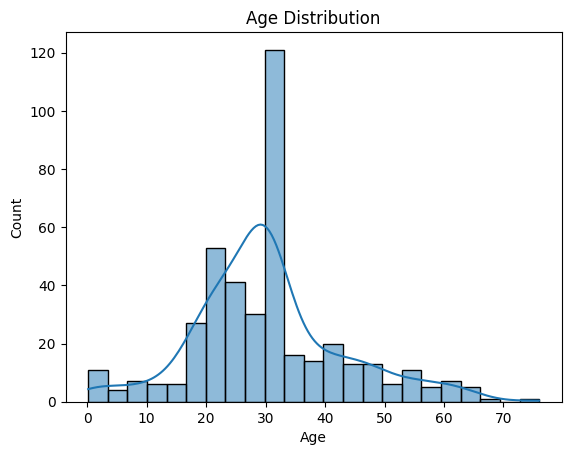

In [94]:
sns.histplot(df_test['Age'], kde=True)

plt.title('Age Distribution')
plt.show()

Checking if the fares feature has an outlier

In [95]:
Q1 = df_train.Fare.quantile(0.25)
Q3 = df_train.Fare.quantile(0.75)

IQR = Q3 - Q1

IQR

np.float64(23.0896)

In [96]:
df_train['Fare'].min()

0.0

In [97]:
df_train['Fare'].max()

512.3292

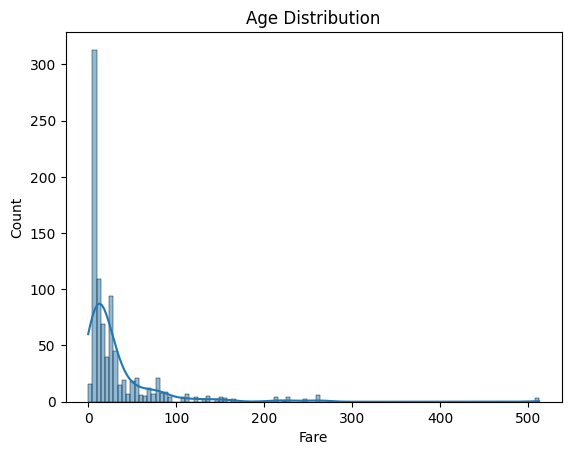

In [98]:
sns.histplot(df_train['Fare'], kde=True)

plt.title('Age Distribution')
plt.show()

The data is left skewed which is fine because this has a relationship with the class column , The higher the class the higher the fare goes and as the higer class has significanlty less individuals therefore the data is left skewed or positively skewed.

In [99]:
Q1 = df_test.Fare.quantile(0.25)
Q3 = df_test.Fare.quantile(0.75)

IQR = Q3 - Q1

IQR

np.float64(23.6042)

In [100]:
df_test['Fare'].min()

0.0

In [101]:
df_test['Fare'].max()

512.3292

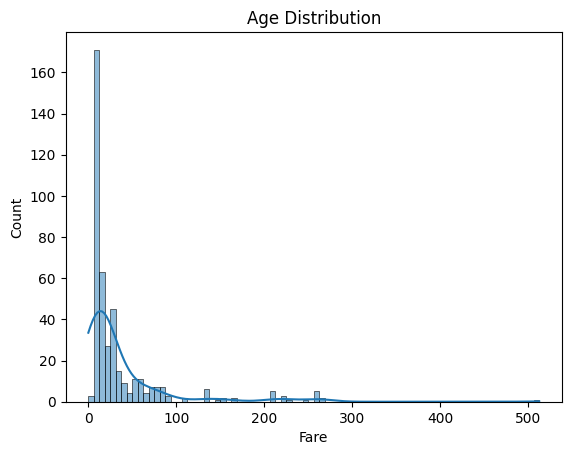

In [102]:
sns.histplot(df_test['Fare'], kde=True)

plt.title('Age Distribution')
plt.show()

Same comment as the one for the training set

# **Preprocessing : [4] - Removing duplicates**

In [103]:
df_train.duplicated().sum()

np.int64(107)

In [104]:
df_train.drop_duplicates(inplace=True)

In [105]:
df_train.duplicated().sum()

np.int64(0)

All the duplicated for the training set was removed

In [106]:
df_test.duplicated().sum()

np.int64(34)

In [107]:
# df_test.drop_duplicates(inplace=True) # Removed this line as it causes issues for Kaggle submission formatting

In [108]:
# df_test.duplicated().sum() # This check is no longer relevant if duplicates are not dropped

All the duplicates for the testing set was removed

# **Preprocessing:[5]-Splitting the training data into matrix of feature [X] and labels [y]**

Splitting the training set into X and y

In [109]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [110]:
X = df_train.iloc[: , 1:]
y = df_train.iloc[: , 0]

Placing the testing data into matrix of features X_test

In [111]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,Unknown,Q
1,3,female,47.0,1,0,7.0000,Unknown,S
2,2,male,62.0,0,0,9.6875,Unknown,Q
3,3,male,27.0,0,0,8.6625,Unknown,S
4,3,female,22.0,1,1,12.2875,Unknown,S


In [112]:
X_test = df_test.iloc[:,:]

# **Preprocessing:[6] - Encoding categorical data for both X_train and X_test**

I need to handle the categorical data and turn every data entry to a number before utilizing machine learning models

In [113]:
X['Cabin'].unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [114]:
# Create a new column 'Deck' by taking the first letter of 'Cabin'
X['Deck'] = X['Cabin'].str[0]

# Dropping the messy 'Cabin' column
X = X.drop('Cabin', axis=1)

# Check the new unique values
print(X['Deck'].unique())

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [115]:
X = pd.get_dummies(X, columns=['Deck'], prefix='Deck', dtype=int)

# Check the result
print(X.head())

   Pclass     Sex   Age  SibSp  Parch  ...  Deck_E Deck_F  Deck_G  Deck_T  Deck_U
0       3    male  22.0      1      0  ...       0      0       0       0       1
1       1  female  38.0      1      0  ...       0      0       0       0       0
2       3  female  26.0      0      0  ...       0      0       0       0       1
3       1  female  35.0      1      0  ...       0      0       0       0       0
4       3    male  35.0      0      0  ...       0      0       0       0       1

[5 rows x 16 columns]


In [116]:
X_test['Cabin'].unique()

array(['Unknown', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78',
       'D34', 'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61',
       'C53', 'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46',
       'C116', 'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97',
       'D22', 'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34',
       'C62 C64', 'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21',
       'C89', 'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [117]:
# Create a new column 'Deck' by taking the first letter of 'Cabin'
X_test['Deck'] = X_test['Cabin'].str[0]

# Dropping the messy 'Cabin' column
X_test = X_test.drop('Cabin', axis=1)

# Check the new unique values
print(X_test['Deck'].unique())

['U' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


In [118]:
X_test = pd.get_dummies(X_test, columns=['Deck'], prefix='Deck', dtype=int)

# Check the result
print(X_test.head())

   Pclass     Sex   Age  SibSp  Parch  ...  Deck_D Deck_E  Deck_F  Deck_G  Deck_U
0       3    male  34.5      0      0  ...       0      0       0       0       1
1       3  female  47.0      1      0  ...       0      0       0       0       1
2       2    male  62.0      0      0  ...       0      0       0       0       1
3       3    male  27.0      0      0  ...       0      0       0       0       1
4       3  female  22.0      1      1  ...       0      0       0       0       1

[5 rows x 15 columns]


In [119]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [120]:
X['Embarked'] = X['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

/tmp/ipython-input-3668369988.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Embarked'] = X['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [121]:
X_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [122]:
X_test['Embarked'] = X_test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

/tmp/ipython-input-2194314096.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Embarked'] = X_test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [123]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [124]:
X['Sex'] = X['Sex'].replace({'male': 1, 'female': 0})

/tmp/ipython-input-3606465250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Sex'] = X['Sex'].replace({'male': 1, 'female': 0})


In [125]:
X_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [126]:
X_test['Sex'] = X_test['Sex'].replace({'male': 1, 'female': 0})

/tmp/ipython-input-94634901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Sex'] = X_test['Sex'].replace({'male': 1, 'female': 0})


# **Splitting the training data into training set and validation set**

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Preprocessing:[7] - Apply Feature scaling**

As feature scaling is only applied for the training set i will only apply it for the matrix of features X_trained

In [128]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,1


In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_train)

The upcoming cell is just to make sure that both columns in X_train and X_test are aligned in the columns

In [130]:
#Adding the missing column (Deck_T) to the test set and fill it with 0 as the training set has T column and the X_tested didn't
X_test['Deck_T'] = 0

#Get the master list of columns from X_trained
train_columns = X_train.columns

#Force X_tested to match that exact order : "Re-order X_tested to match X_trained's order"
X_tested_aligned = X_test[train_columns]

#To make sure there is no missing values
X_tested_aligned.fillna(X_tested_aligned['Fare'].mean() , inplace=True)

# **#Modeling**

In [131]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **#Prediction**

In [132]:
y_pred = classifier.predict(X_val)

# **#Evaluation**

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))
print(f1_score(y_val, y_pred))

[[77 11]
 [19 50]]
0.8089171974522293
0.819672131147541
0.7246376811594203
0.7692307692307693


# **Applying K fold cross validation**

In [134]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train , y = y_train , cv = 10)
print(accuracies.mean())
print(accuracies.std())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7689452124935996
0.04388471093213337


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **Final model**

In [135]:
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression()
# Train on the scaled training features (X) and corresponding training labels (y_train)
final_model.fit(X, y_train)

# Scale the aligned test set using the same scaler fitted on the training data
X_test_scaled = sc.transform(X_tested_aligned)

# Predict on the scaled test data
final_predictions = final_model.predict(X_test_scaled)

In [136]:
# Get the PassengerId from the original test data
passenger_ids = test['PassengerId']

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': final_predictions})

# Display the first few rows of the submission DataFrame
display(submission_df.head())

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [137]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!


You can now download the `submission.csv` file from your Colab environment and submit it to the Kaggle competition!

In [138]:
X.shape

(627, 16)

In [139]:
y.shape

(784,)